In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append('..')
from wyscout.events import get_key_pass_events
from wyscout.match import get_match_events, get_team_matches
from wyscout.api import set_auth, set_cache_base
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
set_cache_base("..")

In [4]:
CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")
set_auth(CLIENT_ID, CLIENT_SECRET)

In [5]:
SOUTHEND = 1687
SEASON_2022 = 188172

In [6]:
def get_key_passes():
    matches = get_team_matches(SOUTHEND, SEASON_2022)
    key_pass_events = []
    for m in matches["matches"]:
        events = get_match_events(m["matchId"])
        if "events" in events:
            key_pass_events.append(get_key_pass_events(
                m, events["events"], SOUTHEND))
    return key_pass_events

In [7]:
matches = get_key_passes()

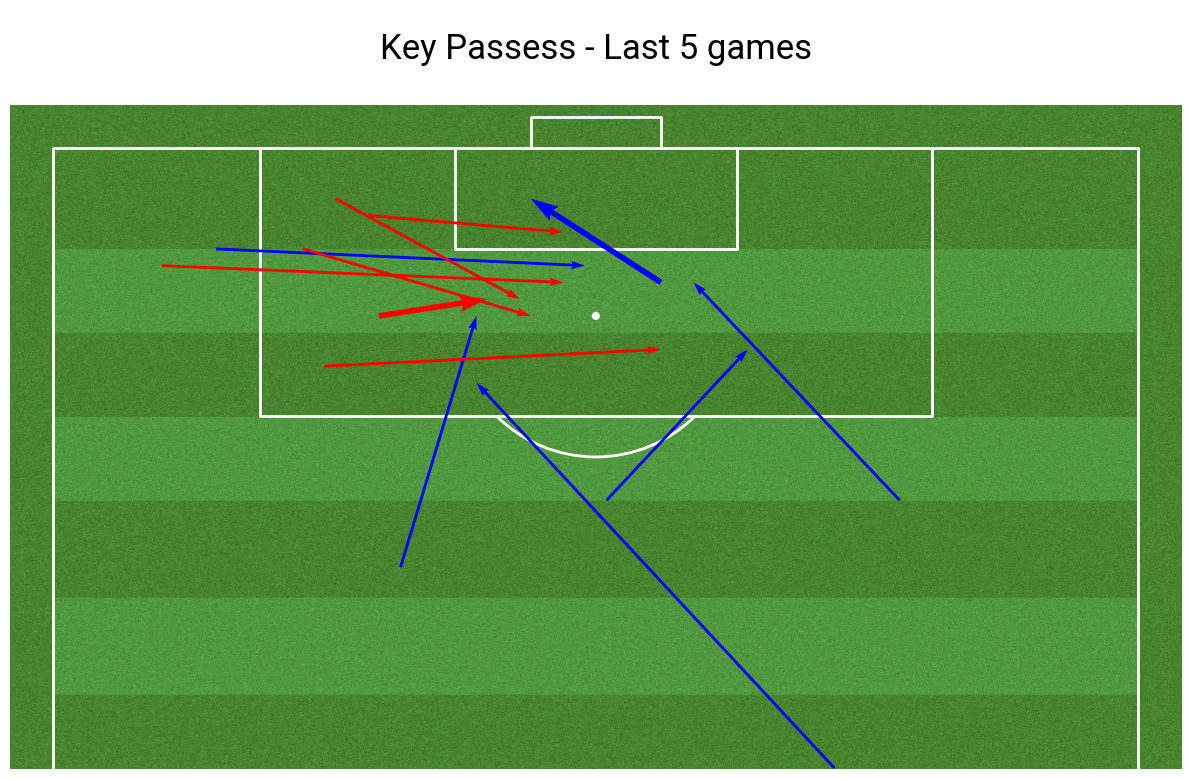

In [8]:
from wyscout.viz.key_passes import plot_key_passes

plot_key_passes(matches, 5, ["J. Bridge"])

In [9]:
def get_shots():
    matches = get_team_matches(SOUTHEND, SEASON_2022)
    events_out = []
    for m in matches["matches"]:
        events = get_match_events(m["matchId"])
        if "events" in events:
            events_out.append({
                "matchId": m["matchId"],
                "date": m["date"],
                "label": m["label"],
                "events": [e for e in events["events"] if e["team"]["id"] == SOUTHEND]
            })
    return events_out

In [10]:
match_events = get_shots()

In [11]:
for i, m in enumerate([m["label"] for m in match_events]):
    print(i,m)

0 Southend United - Dorking Wanderers, 2-0
1 Southend United - Notts County, 2-2
2 Barnet - Southend United, 0-3
3 York City - Southend United, 0-2
4 Maidstone United - Southend United, 0-3
5 Southend United - Scunthorpe United, 3-0
6 Dagenham & Redbridge - Southend United, 1-1
7 Southend United - Woking, 1-1
8 Southend United - Yeovil Town, 1-0
9 Wealdstone - Southend United, 0-1
10 Southend United - Wrexham, 0-0
11 Chesterfield - Southend United, 3-2
12 Southend United - Torquay United, 1-2
13 Southend United - Maidenhead United, 2-0
14 Eastleigh - Southend United, 2-1
15 Southend United - Oldham Athletic, 1-0
16 Halifax Town - Southend United, 0-0
17 Solihull Moors - Southend United, 1-1
18 Southend United - Boreham Wood, 0-1


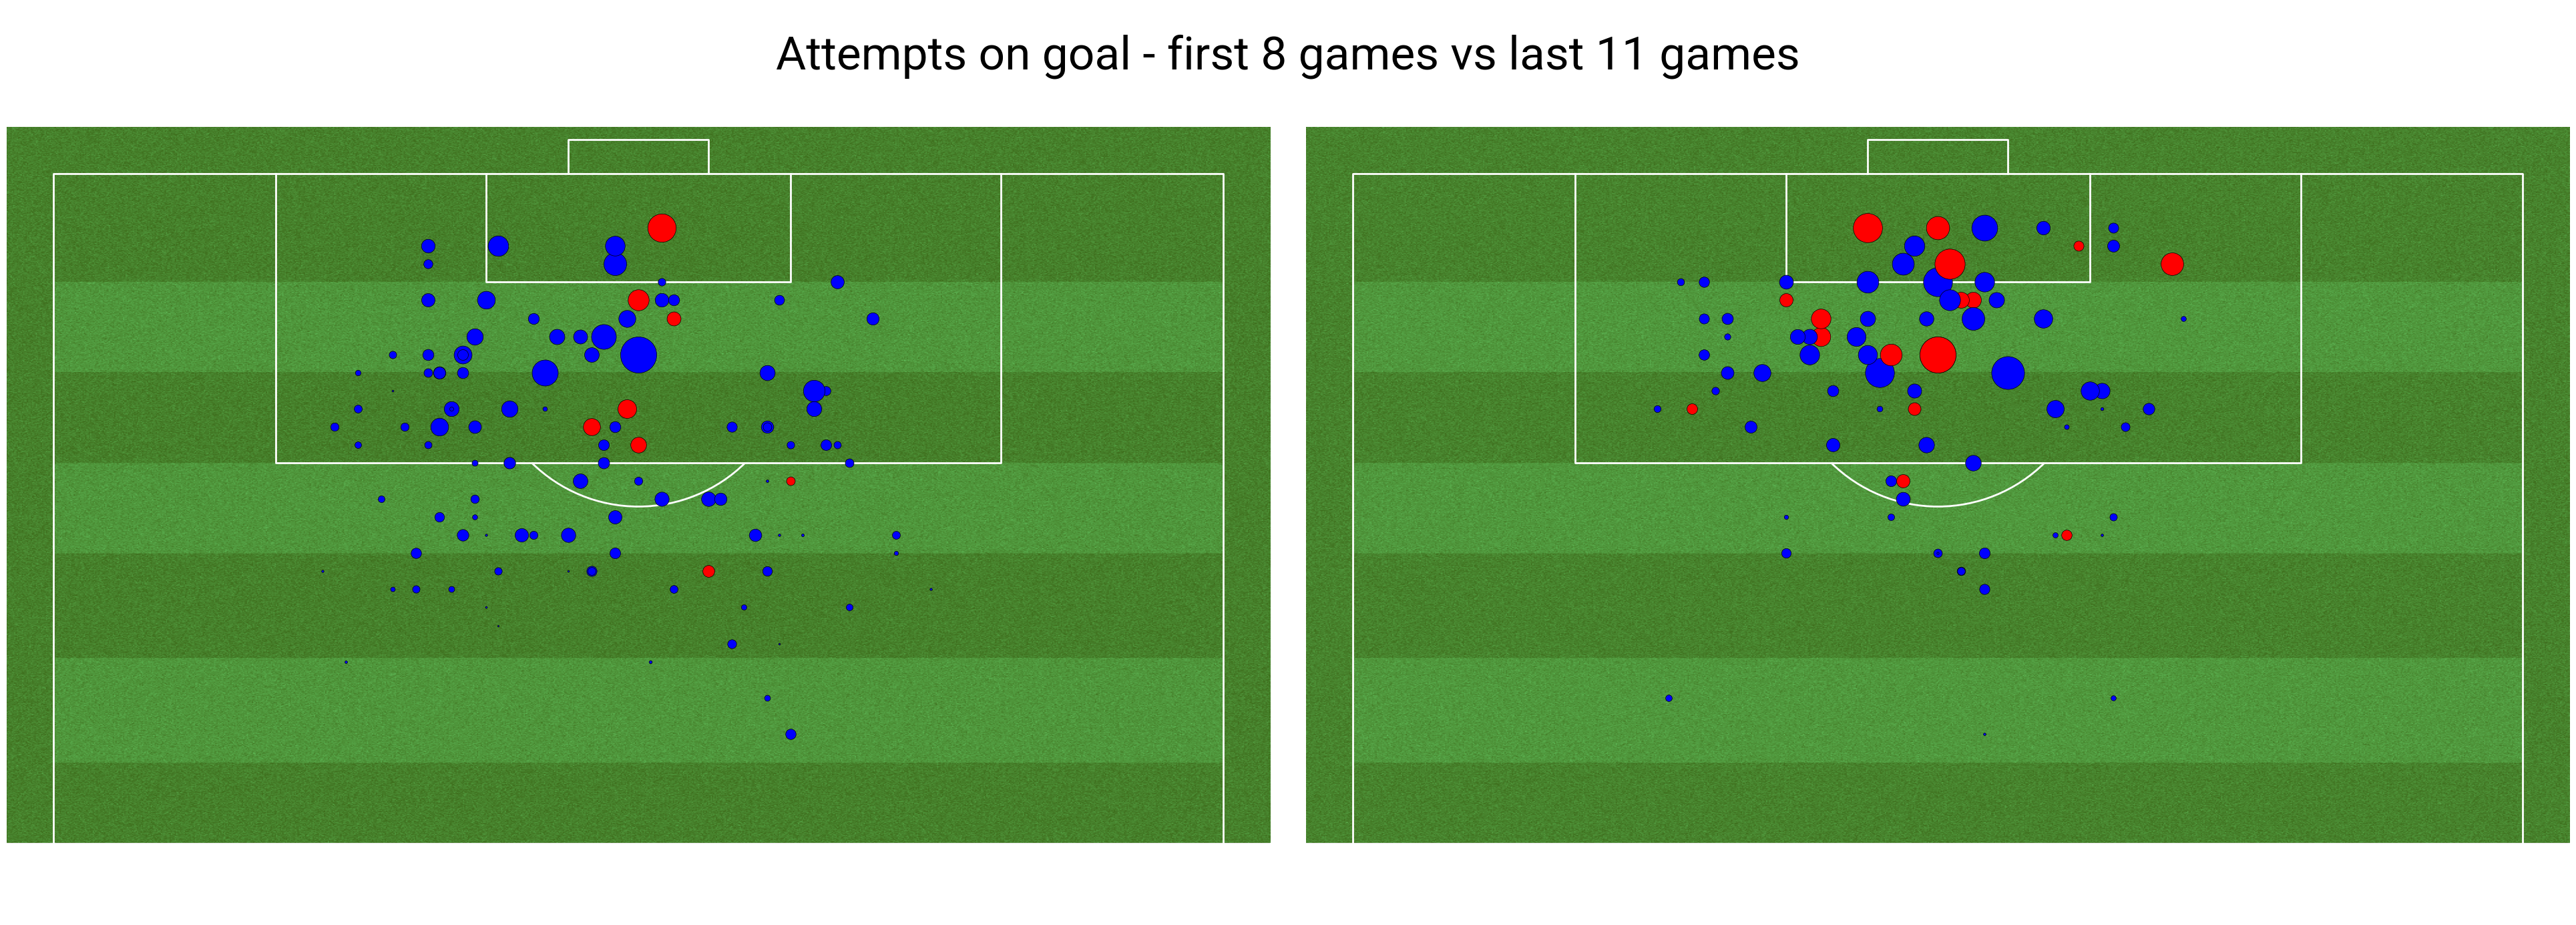

In [12]:
from mplsoccer import VerticalPitch, FontManager
import matplotlib.pyplot as plt

pitch = VerticalPitch(pitch_type="wyscout", half=True, goal_type='box',
                      pad_bottom=-20, pitch_color='grass', line_color='white', stripe=True)
fig, axs = pitch.grid(figheight=15, ncols=2, title_height=0.1, title_space=0.02, axis=False,)

plt.style.use('ggplot')

robotto_regular = FontManager()

first_x_games = 8
last_x_games = len(match_events) - first_x_games

axs['title'].text(0.5, 0.5, f'Attempts on goal - first {first_x_games} games vs last {last_x_games} games', va='center',
                  ha='center', color='black', fontproperties=robotto_regular.prop, fontsize=50)

def plot_matches(match_events, ax):
    for j, match in enumerate(match_events[:8]):
        events = [e for e in match["events"] if e["type"]["primary"] in ["shot", "penalty"]]
        for i, event in enumerate(events):
            size = event["shot"]["xg"] * 2000
            color = "red" if event["shot"]["isGoal"] == True else "blue"
            pitch.scatter(
                event["location"]["x"],
                event["location"]["y"],
                s=size,
                c=[color],
                edgecolors=["black"],
                marker='o',
                ax=axs["pitch"][ax]
            )

            
plot_matches(match_events[-1 * first_x_games:], 0)
plot_matches(match_events[:last_x_games], 1)

plt.show()

In [13]:
len(match_events[-8:])

8

In [14]:
from statistics import mean
for i, m in enumerate(match_events[:]):
    shots = [e for e in m["events"] if e["type"]["primary"] in ["shot", "penalty"]]
    m["total_shots"] = len(shots)
    m["goals"] = len([s for s in shots if s["shot"]["isGoal"] == True ])
    m["average_xg"] = mean([s["shot"]["xg"] for s in shots])
    m["total_xg"] = sum([s["shot"]["xg"] for s in shots])

In [15]:
for m in match_events:
    print(m["label"], m["total_shots"], m["goals"], m["average_xg"], m["total_xg"])

Southend United - Dorking Wanderers, 2-0 9 2 0.2334577777777778 2.1011200000000003
Southend United - Notts County, 2-2 8 2 0.095631875 0.765055
Barnet - Southend United, 0-3 13 3 0.20445615384615384 2.6579299999999995
York City - Southend United, 0-2 8 2 0.19381500000000002 1.5505200000000001
Maidstone United - Southend United, 0-3 11 3 0.13686318181818183 1.505495
Southend United - Scunthorpe United, 3-0 13 3 0.14898876923076923 1.936854
Dagenham & Redbridge - Southend United, 1-1 11 1 0.11981636363636364 1.31798
Southend United - Woking, 1-1 10 1 0.08374856 0.8374855999999999
Southend United - Yeovil Town, 1-0 16 1 0.13650575 2.184092
Wealdstone - Southend United, 0-1 15 1 0.20125366666666666 3.0188050000000004
Southend United - Wrexham, 0-0 13 0 0.0691403076923077 0.898824
Chesterfield - Southend United, 3-2 13 2 0.06985930769230769 0.908171
Southend United - Torquay United, 1-2 28 1 0.10129760714285714 2.8363329999999998
Southend United - Maidenhead United, 2-0 16 2 0.092575625 1.4

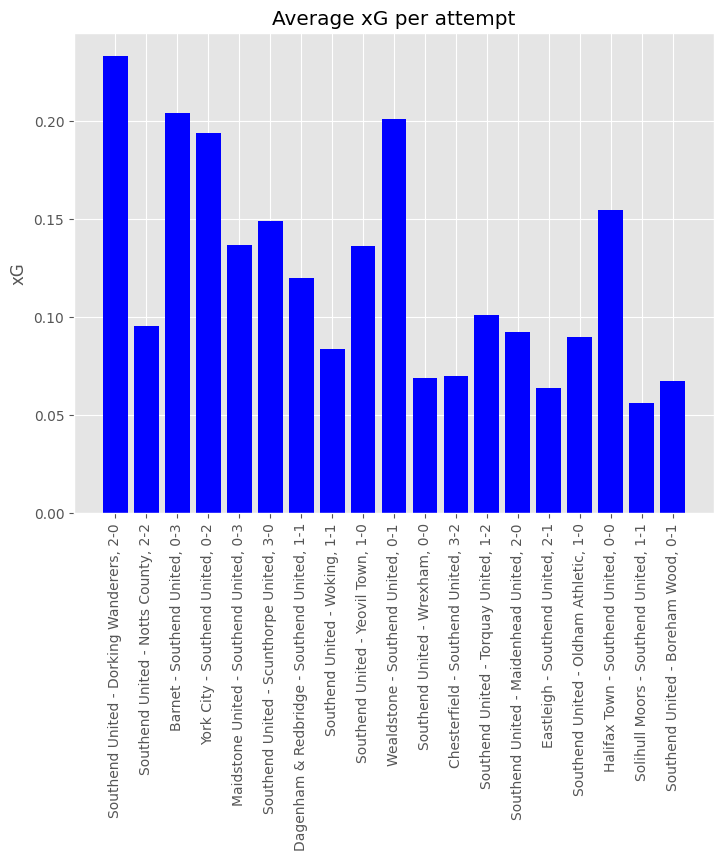

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(
    [m["label"] for m in match_events],
    [m["average_xg"] for m in match_events],
    color=["blue"]
)
plt.xticks(rotation=90)
plt.title("Average xG per attempt")
plt.ylabel("xG")
plt.show()